# AI MAJOR PROJECT 

BY:- MD SHAHBAZ ALAM

In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [4]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
x_train.shape

(50000, 32, 32, 3)

In [5]:
x_test.shape

(10000, 32, 32, 3)

In [6]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [8]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [10]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [53]:
classes = ['airplane', 'automobile','bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship' ,'truck'] 

In [12]:
def plot_sample(x, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

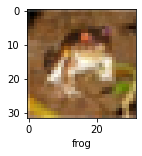

In [13]:
plot_sample(x_train, y_train, 0)

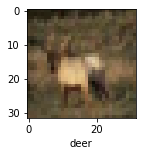

In [14]:
plot_sample(x_train, y_train, 3)

In [17]:
x_train = x_train/255
x_test = x_test/255

In [30]:
val = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='sigmoid')    
    ])

val.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

val.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 61s 39ms/step - loss: 1.8108 - accuracy: 0.3552
Epoch 2/5
1563/1563 [==============================] - 60s 39ms/step - loss: 1.6215 - accuracy: 0.4290
Epoch 3/5
1563/1563 [==============================] - 58s 37ms/step - loss: 1.5398 - accuracy: 0.4570
Epoch 4/5
1563/1563 [==============================] - 58s 37ms/step - loss: 1.4812 - accuracy: 0.4771
Epoch 5/5
1563/1563 [==============================] - 61s 39ms/step - loss: 1.4338 - accuracy: 0.4941


In [33]:
val.evaluate(x_test, y_test)

313/313 [==============================] - 3s 10ms/step - loss: 1.4880 - accuracy: 0.4667


[1.4879590272903442, 0.4666999876499176]

In [34]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = val.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classifivatin Report\n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 3s 9ms/step
Classifivatin Report
               precision    recall  f1-score   support

           0       0.59      0.42      0.49      1000
           1       0.70      0.42      0.53      1000
           2       0.37      0.40      0.38      1000
           3       0.33      0.46      0.38      1000
           4       0.45      0.36      0.40      1000
           5       0.55      0.20      0.29      1000
           6       0.48      0.63      0.54      1000
           7       0.61      0.50      0.55      1000
           8       0.38      0.83      0.52      1000
           9       0.61      0.45      0.52      1000

    accuracy                           0.47     10000
   macro avg       0.51      0.47      0.46     10000
weighted avg       0.51      0.47      0.46     10000



In [44]:
cnn = models.Sequential([
        #cnn
        layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
        layers.MaxPooling2D((2,2)),
    
        layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
    
        #dense
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

In [45]:
cnn.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [46]:
cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 21s 13ms/step - loss: 1.5047 - accuracy: 0.4600
Epoch 2/10
1563/1563 [==============================] - 21s 13ms/step - loss: 1.1700 - accuracy: 0.5879
Epoch 3/10
1563/1563 [==============================] - 21s 13ms/step - loss: 1.0451 - accuracy: 0.6336
Epoch 4/10
1563/1563 [==============================] - 21s 13ms/step - loss: 0.9622 - accuracy: 0.6653
Epoch 5/10
1563/1563 [==============================] - 21s 13ms/step - loss: 0.8957 - accuracy: 0.6893
Epoch 6/10
1563/1563 [==============================] - 21s 13ms/step - loss: 0.8446 - accuracy: 0.7065
Epoch 7/10
1563/1563 [==============================] - 21s 13ms/step - loss: 0.8006 - accuracy: 0.7209
Epoch 8/10
1563/1563 [==============================] - 21s 13ms/step - loss: 0.7643 - accuracy: 0.7360
Epoch 9/10
1563/1563 [==============================] - 21s 13ms/step - loss: 0.7312 - accuracy: 0.7446
Epoch 10/10
1563/1563 [==============================] - 21s 13m

In [47]:
cnn.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.9469 - accuracy: 0.6879


[0.9468856453895569, 0.6879000067710876]

In [51]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

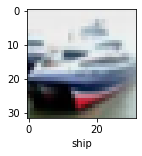

In [54]:
plot_sample(x_test, y_test, 1)

In [55]:
y_pred = cnn.predict(x_test)
y_pred[:5]

313/313 [==============================] - 1s 4ms/step


array([[2.97786389e-03, 5.24564821e-04, 2.63863127e-03, 8.17329586e-01,
        6.53877330e-04, 1.60566747e-01, 6.74477918e-03, 2.77843774e-05,
        8.40609800e-03, 1.30146960e-04],
       [1.15756188e-02, 1.33375496e-01, 1.22512552e-06, 1.06781818e-05,
        8.77908448e-08, 1.81581868e-07, 6.78903467e-09, 7.93432875e-08,
        8.55020344e-01, 1.63033528e-05],
       [4.88429815e-01, 1.69611901e-01, 1.04039479e-02, 1.41793489e-02,
        7.54998182e-04, 2.27780850e-03, 2.50236480e-04, 8.98691884e-04,
        2.97196031e-01, 1.59971900e-02],
       [8.70008588e-01, 5.30056597e-04, 1.41402837e-02, 1.69430816e-04,
        3.49530578e-03, 1.77700178e-06, 2.88138544e-05, 8.60297514e-05,
        1.11537896e-01, 1.77070888e-06],
       [2.55288876e-04, 1.65939593e-06, 1.53762931e-02, 1.18771151e-01,
        4.20798063e-01, 3.15527283e-02, 4.13199693e-01, 6.27903592e-06,
        3.82009894e-05, 6.24487996e-07]], dtype=float32)

In [57]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 0, 0, 4]

In [58]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

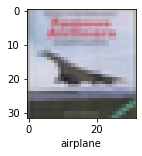

In [60]:
plot_sample(x_test, y_test, 3)

In [61]:
classes[y_classes[3]]

'airplane'

In [62]:
print("Classification Report\n", classification_report(y_test, y_classes))

Classification Report
               precision    recall  f1-score   support

           0       0.67      0.77      0.72      1000
           1       0.79      0.82      0.81      1000
           2       0.55      0.63      0.59      1000
           3       0.53      0.49      0.51      1000
           4       0.63      0.61      0.62      1000
           5       0.55      0.66      0.60      1000
           6       0.81      0.74      0.77      1000
           7       0.79      0.67      0.73      1000
           8       0.82      0.78      0.80      1000
           9       0.83      0.70      0.76      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000

